## **From Understanding to Preparation**

#### Objectives

After completing this lab you will be able to:

* Understand Data
* Prepare data for analysis and inference

#### Table of Content

<div style="margin-top: 10px">
    <ol>
        <li><a href="#Recap">Recap</a></li>
        <li><a href="#Data-Understanding">Data Understanding</a></li>
        <li><a href="#Data-Preparation">Data Preparation</a></li>
    </ol>
</div>

#### Recap
<div id="Recap"></div>

In Lab **From Requirements to Collection**, we learned that the data we need to answer the question developed in the business understanding stage, namely "_can we automate the process of determining the cuisine of a given recipe?_", is readily available. A researcher named Yong-Yeol Ahn scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely:


<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig3_allrecipes.png" width="550">
    <br>
    <div>www.allrecipes.com</div>
</div>

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig4_epicurious.png" width="550">
    <br>
    <div>www.epicurious.com</div>
</div>

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig5_menupan.png" width="550">
    <br>
    <div>www.menupan.com</div>
</div>


For more information on Yong-Yeol Ahn and his research, you can read his paper on [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987).


In [2]:
import pandas as pd
import numpy as np
import re
import random

pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
recipes = pd.read_csv("/Users/azhar/Documents/python learning/data-science-lab/Data Science Methodology/recipes.csv")

recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [4]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

---

# Data Modeling

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_data_modeling.png" width="500">


In [5]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

import itertools

In [6]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

## `bamboo_tree` Only Asian and Indian Cuisines

Here, you are creating a decision tree for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason this action is because the decision tree does not run well when the data is biased towards one cuisine or a group of cuisines, such as in this case, American cuisines. We can exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. Let's go with the second solution.

Let's build our decision tree using the data pertaining to the Asian and Indian cuisines and name our decision tree `bamboo_tree`.

In [7]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(['korean', 'japanese', 'chinese', 
                                                    'thai', 'indian'])]
cuisines = asian_indian_recipes['cuisine']
ingredients = asian_indian_recipes.iloc[:, 1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


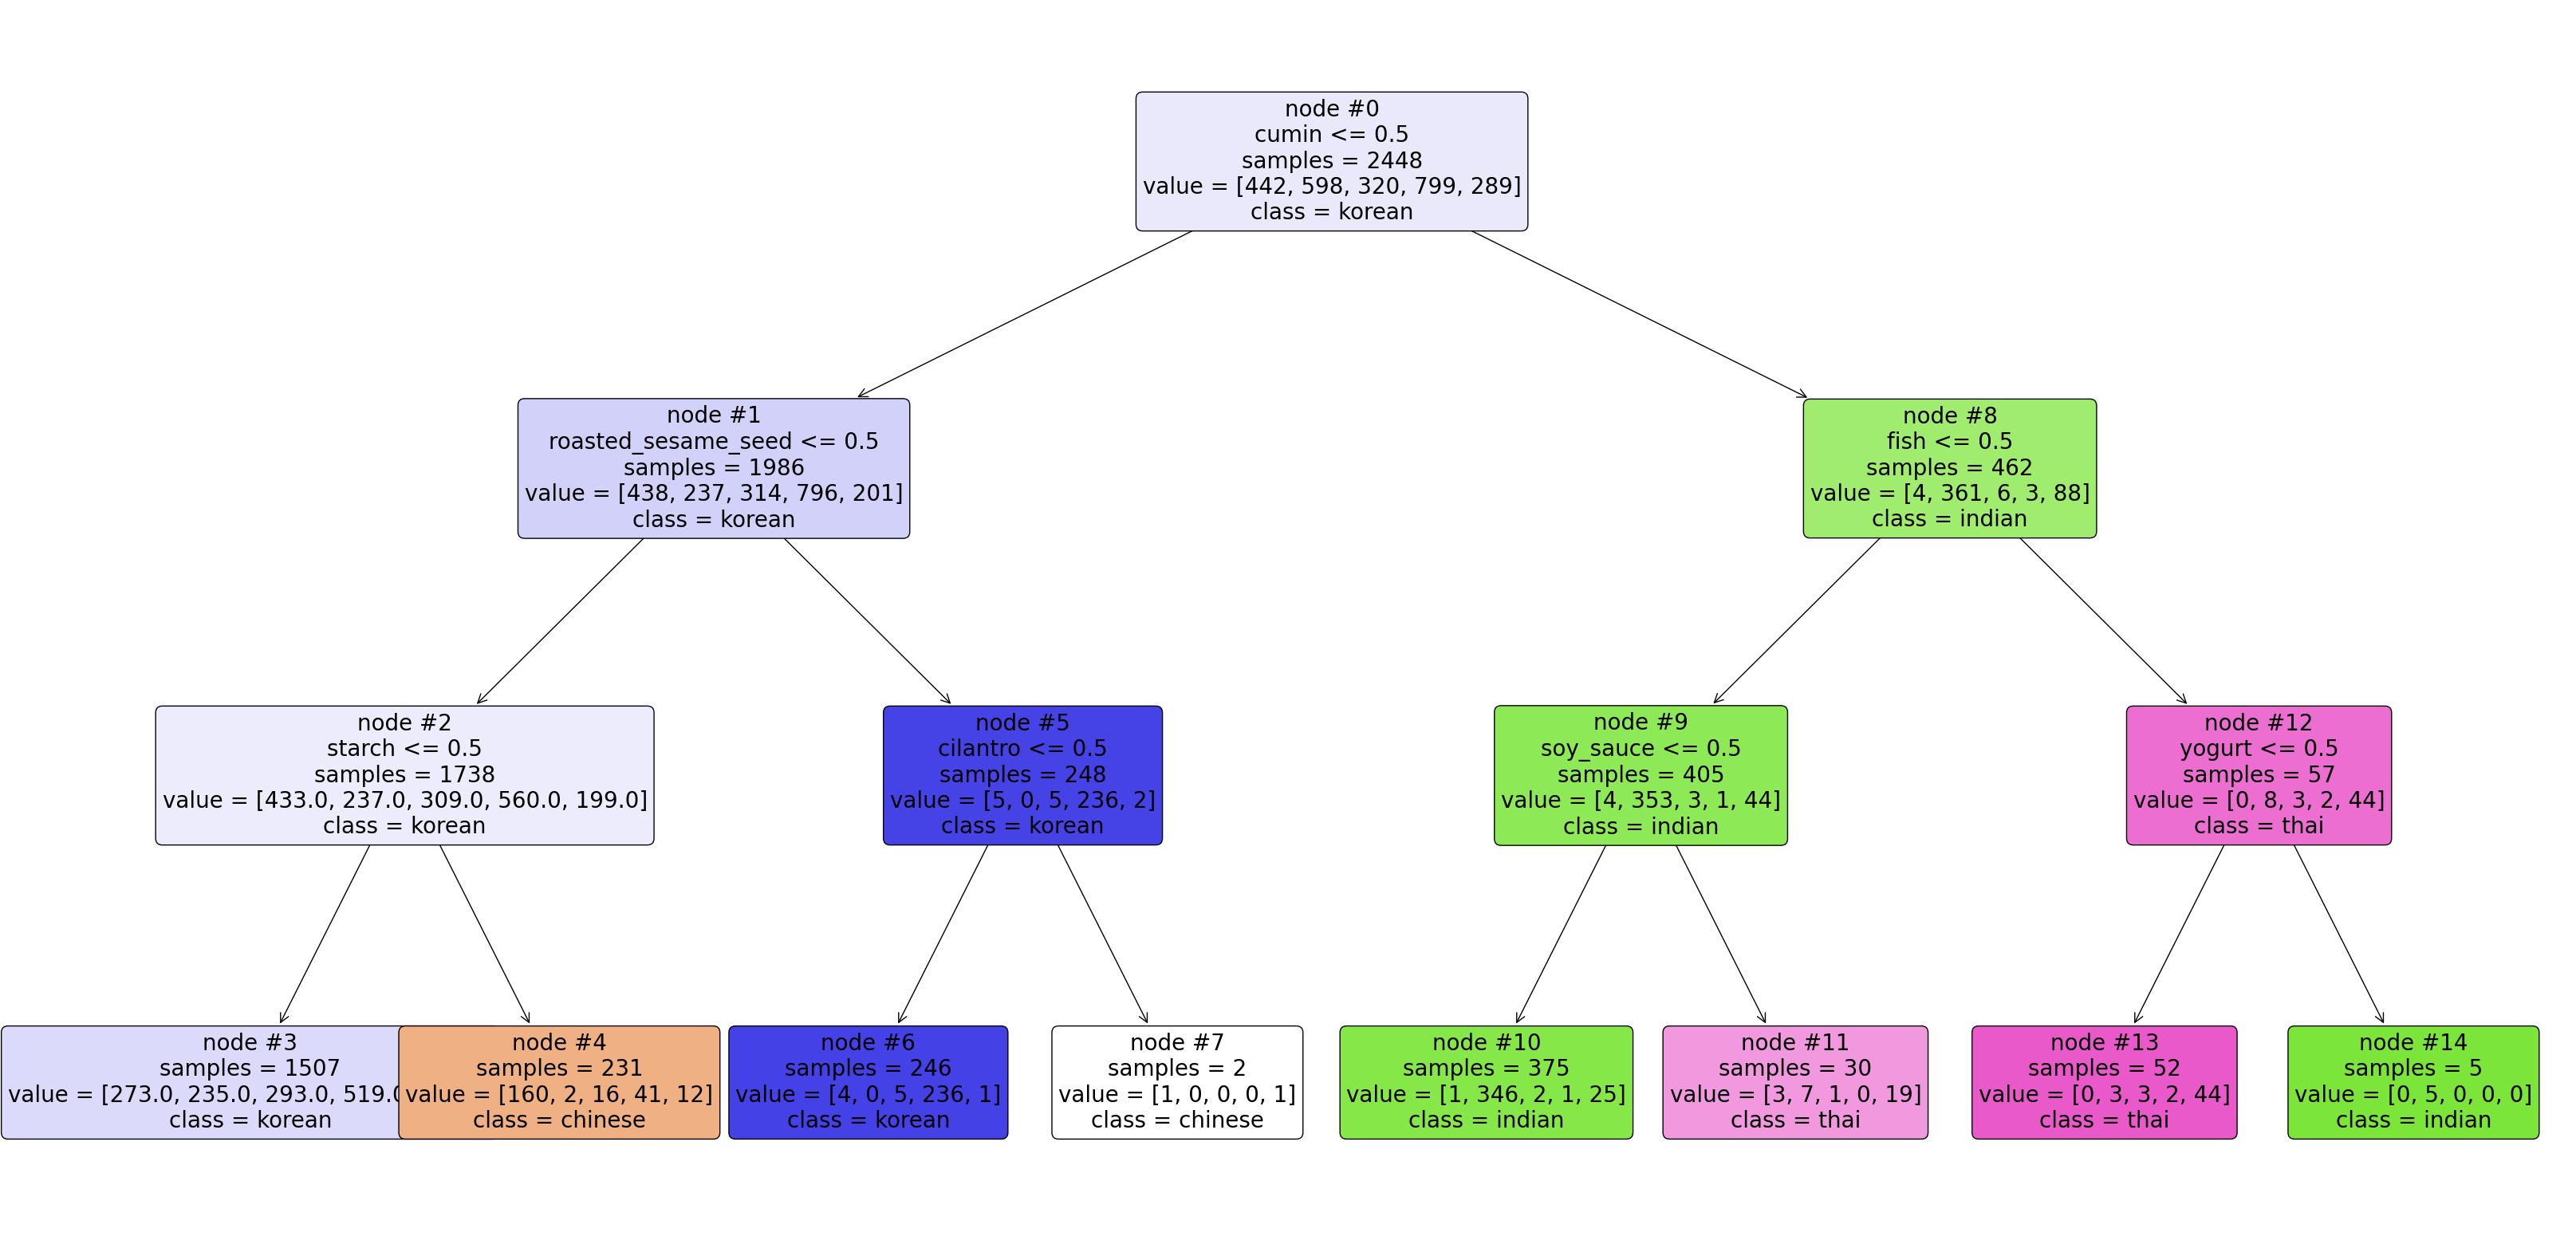

In [8]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names = np.unique(cuisines), filled=True,
                   node_ids = True,
                   impurity = False,
                   label = "all",
                   fontsize = 20,
                   rounded = True)

plt.show()

The decision tree learned:

* If a recipe contains *cumin* and *fish* and **no** *yoghurt*, then it is most likely a **Thai** recipe.
* If a recipe contains *cumin* but **no** *fish* and **no** *soy_sauce*, then it is most likely and **indian** recipe.

You can analyze the remaining branches of the tree to come up with similar rules for determining the cuisine of different recipes.

Feel free to select another subset of cuisines and build a decision tree of their recipes. You can select some European cuisines and build decision trees to explore the ingredients that differentiate those cuisines.

---

# Model Evaluation

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_evaluation.png" width="500">


Next, to evaluate our model of Asian and Indian cuisines, you will split the data set into a training set and a test set. You will build the decision tree using the training set. Then, you will test the model on the test set and compare the cuisines that the model predicts to the actual cuisines.

First create a new dataframe using only the data pertaining to the Asian and the Indian cuisines, and let's call the new dataframe **bamboo**.

In [9]:
bamboo = recipes[recipes.cuisine.isin(['korean', 'japanese', 'thai', 'indian', 'chinese'])]

Now see how many recipes exist for each cuisine

In [10]:
bamboo['cuisine'].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

Let's remove 30 recipes from each cuisine to use as the test set, and let's name this test set `bamboo_test`.

In [11]:
# set sample size
sample_n = 30

Next, create a dataframe containing 30 recipes form each cuisine, selected randomly.

In [12]:
# take 30 recipes from each cuisine
random.seed(1234) # set random seed
bamboo_test = bamboo.groupby('cuisine', group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:, 1:] # ingredients
bamboo_test_cuisines = bamboo_test['cuisine'] # cuisines

Check that there are 30 recipes for each cuisine.

In [13]:
# Check that we have 30 recipes from each cuisine
bamboo_test['cuisine'].value_counts()

cuisine
chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: count, dtype: int64

Now create the training set by removing the test set from the `bamboo` data set, and name the training set `bamboo_train`

In [14]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:, 1:]
bamboo_train_cuisines = bamboo_train['cuisine']

Verify that there are 30 *fewer* recipes now for each cuisines.

In [17]:
bamboo_train['cuisine'].value_counts()

cuisine
korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: count, dtype: int64

Let's build the decision tree using the training set, `bamboo_train`, and name the generated tree `bamboo_train_tree` for prediction.

In [18]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


Let's plot the decision tree and explore it.

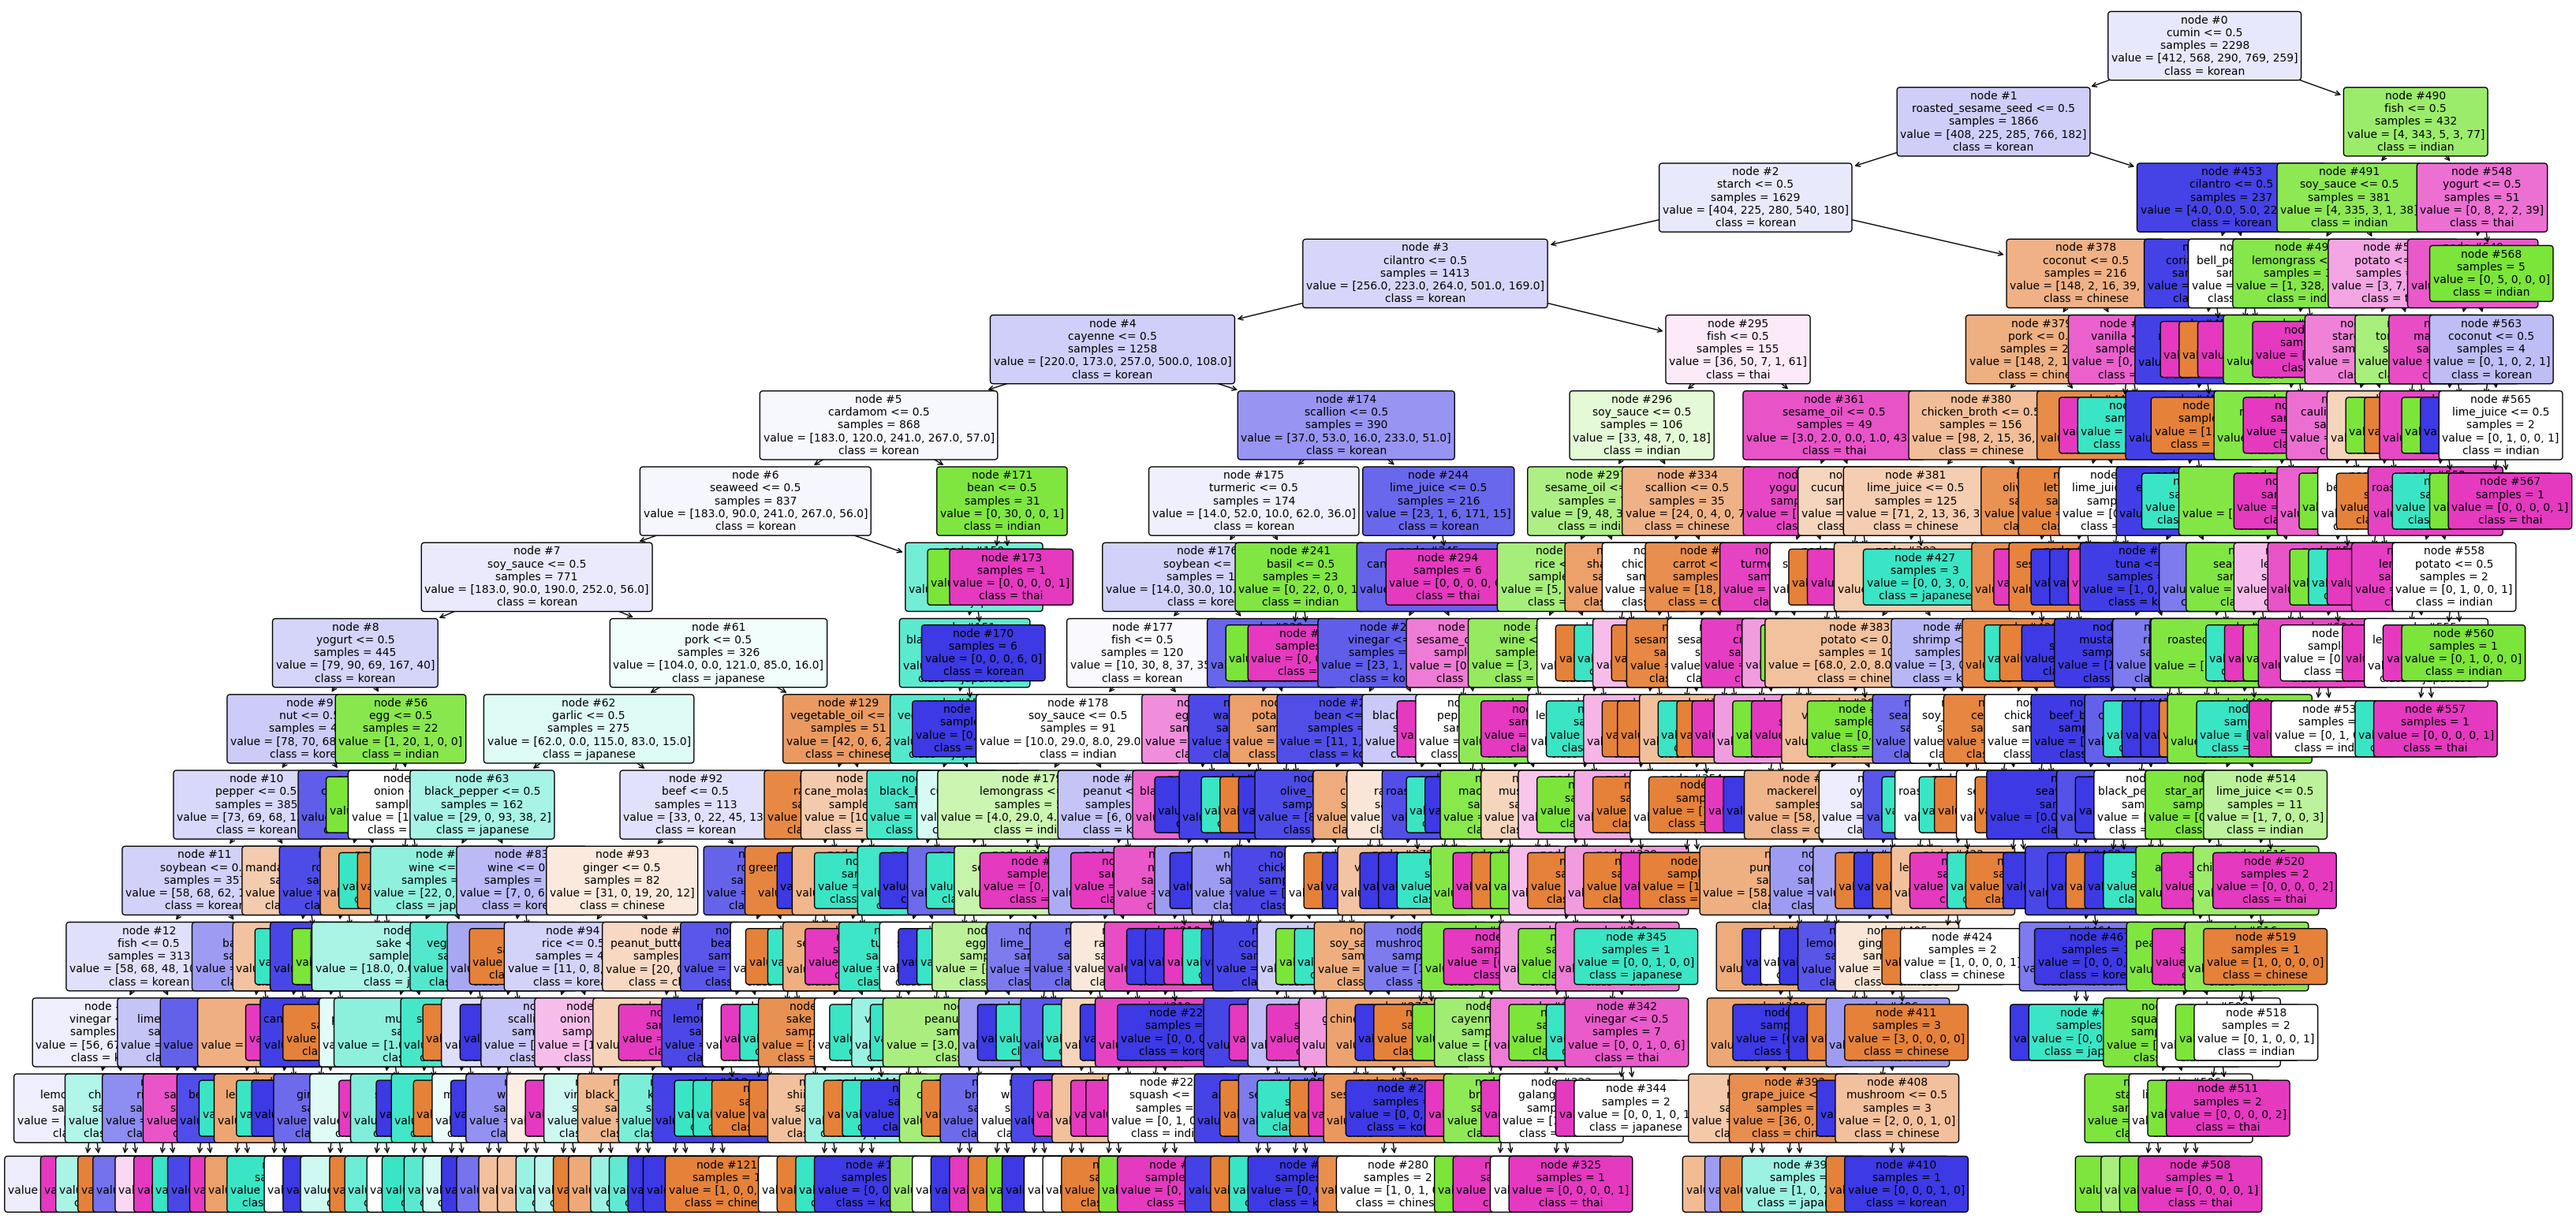

In [19]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(bamboo_train_tree,
                   feature_names = list(bamboo_train_ingredients.columns.values),
                   class_names = np.unique(bamboo_train_cuisines),
                   filled = True,
                   node_ids = True,
                   impurity = False,
                   label = "all",
                   fontsize = 10, rounded = True)
plt.show()

Now that you defined our tree to be deeper, more decision nodes are generated.

#### Now let's test our model on the test data

In [20]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

To quantify how well the decision tree is able to determine the cuisine of each recipe correctly, we will create a confusion matrix which presents a nice summary on how many recipes from each cuisine are correctly classified. It also sheds some light on what cuisines are being confused with what other cuisines.

So let's go ahead and create the confusion matrix for how well the decision tree is able to correctly classify the recipes in `bamboo_test`.

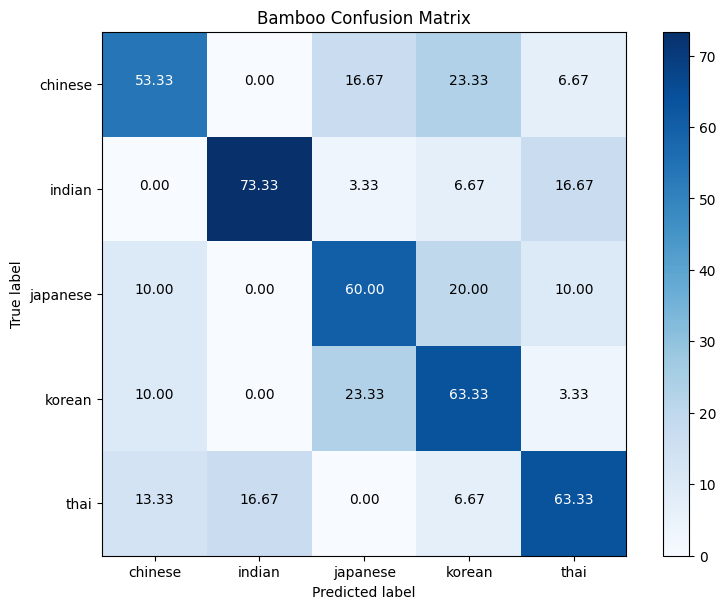

In [21]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines,
                                           labels = test_cuisines)
title = "Bamboo Confusion Matrix"
cmap = plt.cm.Blues

plt.figure(figsize=(8,6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
) * 100

plt.imshow(bamboo_confusion_matrix, interpolation = 'nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             ha = 'center',
             color='white' if bamboo_confusion_matrix[i,j] > thresh else 'black')
    
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

The rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. According to this confusion matrix, we make the following observations:

* Using the first row in the confusion matrix, 53% of the **Chinese** recipes in bamboo_test were correctly classified by our decision tree whereas 23% of the **Chinese** recipes were misclassified as **Korean**, 16% of the **Chinese** recipes were misclassified as **Japanese**, and 6% of the **Chinese** recipes were misclassified as **Thai**.

* Using the **Indian** row, 73% of the **Indian** recipes in bamboo_test were correctly classified by our decision tree and 3% of the **indian** recipes were misclassfied as **Japanese** and 6% were misclassified as **Korean** and 16% were misclassified as **Thai**.